In this notebook, we look at the Fashion MNIST dataset which consists of image data of 10 different categories of clothing. The training dataset consists of 60000 images of 28x28 pixels each and test dataset consists of 10000 images. We analyse the data using classical machine learning as well as a neural network model. The analysis is relatively simple as there is no data preprocessing or feature engineering that we do in the analysis. (However, for further fine tuning of the classical ml models, it might be worth doing some feature engineering (e.g. PCA))

### 1. Setup


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 2. Load Data


In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [26]:
((X_train,y_train),(X_test,y_test)) = fashion_mnist.load_data()

In [5]:
# X_train[0:3]

In [6]:
# X_train[0]

In [7]:
y_train[0:5]

array([9, 0, 0, 3, 0], dtype=uint8)

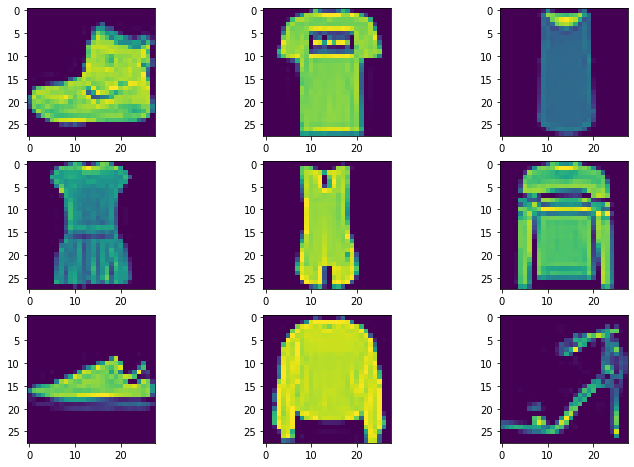

In [8]:
fig = plt.figure(figsize=(12,8))

for i in range(0,9):
    ax = fig.add_subplot(3,3,i+1)
    plt.imshow(X_train[i])

In [27]:
X_train.shape

(60000, 28, 28)

In [28]:
X_test.shape

(10000, 28, 28)

In [12]:
# y_train.shape

In [13]:
# y_test.shape

In [14]:
print('No. of features:', 28*28)

No. of features: 784


In [15]:
np.unique(y_test,return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [16]:
np.unique(y_train,return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

### 3. Preprocessing

### 4. Feature Engineering

### 5. Model Selection

Models to try out: 
1. Random Forest
2. Gradient Boost 
3. Extreme Gradient Boost 

In [19]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [20]:
X_modeltrain,X_modelval,y_modeltrain,y_modelval = train_test_split(X_train,y_train,test_size = 0.2)

In [21]:
X_modeltrain = X_modeltrain.reshape(X_modeltrain.shape[0],X_modeltrain.shape[1]*X_modeltrain.shape[2])
X_modelval = X_modelval.reshape(X_modelval.shape[0],X_modelval.shape[1]*X_modelval.shape[2])

In [22]:
Models = [RandomForestClassifier()]

# Models = [RandomForestClassifier(),GradientBoostingClassifier(),XGBClassifier()]
modelacctraindata = []
modelaccvaldata = []
for model in Models:
    modelitn = model
    model.fit(X_modeltrain,y_modeltrain)
    modelacctraindata.append(model.score(X_modeltrain,y_modeltrain))
    modelaccvaldata.append(model.score(X_modelval,y_modelval))  

### Gradient Boosting classifier & XGBoost took forever to train (> 30min) on my machine, hence currently skipping them, and keeping only random forest

In [23]:
# modelnames = [0,'RandomForest']
# plt.figure(figsize = (10,6))

# # plt.plot(modelacctraindata,'b-')
# plt.plot(modelaccvaldata,'ro')
# locs,labels = plt.xticks()
# plt.xticks(locs,modelnames)

In [24]:
print('Random forest: Training accuracy = ',modelacctraindata[0])
print('Random forest: Validation accuracy = ',modelaccvaldata[0])

Random forest: Training accuracy =  1.0
Random forest: Validation accuracy =  0.8863333333333333


### 6. Fine Tuning

### 7. Test Data Performance

In [59]:
FinalRFModel = RandomForestClassifier()
FinalRFModel.fit(X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2]),y_train)
RFTestAccuracy = FinalRFModel.score(X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2]),y_test)
                 
print('RF Model Test Performance (Accuracy) = ',RFTestAccuracy)

RF Model Test Performance (Accuracy) =  0.8745


### Deep Learning Model (Advanced, Optional)

### 1. Setup 

In [29]:
import tensorflow as tf
from tensorflow import keras

### 2. Load Data

### 3. Preprocessing

In [30]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [35]:
X_train_scaled.shape

(60000, 28, 28)

In [31]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 4. Feature Engineering 

### 5. Model Architecture

In [32]:
NNModel = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (X_train.shape[1],X_train.shape[2])),
    tf.keras.layers.Dense(activation = 'relu',units = 128),
    tf.keras.layers.Dense(units = 10,activation = 'softmax')
])

<img src="Selection_031.png"> 

#### Source : Youtube/Tensorflow: https://www.youtube.com/watch?v=FiNglI1wRNk 

In [33]:
NNModel.compile(optimizer='adam',
               loss= tf.keras.losses.sparse_categorical_crossentropy,
               metrics=['accuracy'])


* When to choose sparse_categorical_crossentropy vs categorical_crossentropy ? 

#### train the model

In [34]:
NNModel.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6520 - accuracy: 0.7738
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3854 - accuracy: 0.8623
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3389 - accuracy: 0.8757
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3186 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2935 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2781 - accuracy: 0.8985
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2633 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2594 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2485 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.241

In [36]:
TrainLoss,TrainAccuracy = NNModel.evaluate(X_train_scaled,y_train)
print('Training Accuracy = ',TrainAccuracy)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2215 - accuracy: 0.9182
Training Accuracy =  0.9181666374206543


### 6. Fine Tuning

### 7. Test Data Performance 

In [37]:
TestLoss,TestAccuracy = NNModel.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3370 - accuracy: 0.8855


In [38]:
print('Test Data Accuracy = ',TestAccuracy)

Test Data Accuracy =  0.8855000138282776


### 8. Look at some predictions

In [39]:
predictions = NNModel.predict(X_test_scaled)

In [40]:
np.argmax(predictions[0])

9

In [41]:
y_test[0]

9

### References for NN model:
1. https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb
2. https://www.youtube.com/watch?v=FiNglI1wRNk
3. https://www.tensorflow.org/tutorials/keras/classification


### Python notes
1. imshow for plotting image from pixels. 
2. Found a super elegant way for subplotting, which used to otherwise crack my head with axs flattening and what not. Just add_subplot with nrow,ncol and currentindex argument and then put the plot. < TearyEyed >
3. Reshape training data to 2D. reshape(lengthofdataset,numberoffeatures)

### Notes
1. MLMAstery guy: some crazy deep learning. and accuracy still capped at 91%. https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/

    

### Summary: 
1. In this notebook, we looked at image data consisting of 10 different clothing categories. 
2. The analysis was rather simple, with just random forest model run on the data. The data is reshaped to flatten the pixels before trained on the model. 
3. We did an 80:20 training:validation split from the training data available for training the model.
4. Training data score of Random Forest model is 1, Validation data score is ~0.87 and test data score is ~0.88. These scores indicate some overfitting of the model on the training data, however the test data score is good. 
5. Training of Gradient Boost & Extreme Gradient Boost took too long (> 30min), hence I skipped them for now.
6. Next, we tried a neural network model on the data. We flattened the data as we did in the random forest model and scaled it by max value for better training of the model. We connected the input layer to a fully connected layer of 128 neurons activated by relu. The relu layer is then connected to a layer consisting of 10 units activated by softmax function. 
7. NN Model optimizer = Adam, Loss function = Sparse categorical crossentropy, Metric = Accuracy. 
8. We trained the model with 10 epochs. We got training accuracy ~0.91 & test accuracy ~0.88. 
9. We currently haven't fine tuned any of the models, since the base model results are decent. 
10. Fine tuning of the models and trying out other simpler models for later. 
